In [29]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np
import pandas as pd
import gzip
import pickle as cPickle
import matplotlib.pyplot as plt


# In[2]:


def relu(Z):
    result = (Z + np.abs(Z))/2
    return result


# In[4]:


def relu_backward(Z):
    result = (Z + np.abs(Z))/(2*np.abs(Z))
    return result


# In[5]:
def prediction(Al, Ynum):
    arg = np.argmax(Al,axis=0)
    arg = arg.reshape(1,Ynum.shape[1])
    # print(arg.shape, Ynum.shape)
    cnt = 0
    # print("predicting")
    for i in range(Ynum.shape[1]):
        if(arg[0,i]==Ynum[0,i]):
            cnt = cnt+1
    return (cnt/Ynum.shape[1])

def softmax(Z):
    temp = np.exp(Z)
    result = temp/np.sum(temp,axis = 0,keepdims = True)
    return result


# In[6]:


def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims) - 1
    for l in range(1,L + 1):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
        #print(parameters)
    return parameters


# In[7]:


def forward_prop(X,parameters):
    cache = {}
    L = len(layer_dims) - 1
    A_prev = X
    for l in range(1,L):
        Z = parameters["W" + str(l)].dot(A_prev) + parameters["b" + str(l)]
        A = relu(Z)
        cache["Z" + str(l)] = Z
        A_prev = A
    Z = parameters["W" + str(L)].dot(A_prev) + parameters["b" + str(L)]
    AL = softmax(Z)
    cache["Z" + str(L)] = Z
    return AL,cache


# In[8]:


def compute_cost(AL,Y):
    m = AL.shape[1]
    cost = (np.sum(-(Y * np.log(AL))))/(m)
    return cost


# In[9]:


def backward_prop(X,Y,cache,parameters,AL,layer_dims):
    m = X.shape[1]
    dparameters = {}
    L = len(layer_dims) - 1
    dZ = AL - Y
    dparameters["dW" + str(L)] = dZ.dot(relu(cache["Z" + str(L-1)]).transpose())/m
    #dparameters["dW" + str(L)] = dZ.dot(X.transpose())/m
    dparameters["db" + str(L)] = np.sum(dZ,axis = 1,keepdims = True)/m
    for l in range(1,L):
        dZ = ((parameters["W" + str(L-l+1)].transpose()).dot(dZ)) * (relu_backward(cache["Z" + str(L-l)]))
        if L-l-1 != 0:
            dparameters["dW" + str(L-l)] = dZ.dot(relu(cache["Z" + str(L-1-l)]).transpose())/m
        else:
            dparameters["dW" + str(L-l)] = dZ.dot(X.transpose())/m
        dparameters["db" + str(L-l)] = np.sum(dZ,axis = 1,keepdims = True)/m
    return dparameters  


# In[10]:


def update_parameters(parameters,dparameters,layer_dims,learning_rate):
    L = len(layer_dims) - 1
    for l in range(1,L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*dparameters["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*dparameters["db" + str(l)]
    return parameters


# In[11]:


def learn(X, X_test, Y, Y_test, Ynum, Ynum_test, layer_dims, learning_rate, num_iters):
    costs = []
    costs_test = []
    accs = []
    accs_test = []
    parameters = initialize_parameters(layer_dims)
    for i in range(num_iters):
        AL,cache = forward_prop(X, parameters)
        AL_test,cache_test = forward_prop(X_test, parameters)
        dparameters = backward_prop(X,Y,cache,parameters,AL,layer_dims)
        parameters = update_parameters(parameters,dparameters,layer_dims,learning_rate)
        costs.append(compute_cost(AL, Y))
        accs.append(100*prediction(AL,Ynum))
        costs_test.append(compute_cost(AL_test, Y_test))
        accs_test.append(100*prediction(AL_test,Ynum_test))
        if i%10 == 0:
            print("Iterations : ", i)
            print("Tr_Acc : ", accs[i], "Test_Acc : ", accs_test[i])
            print("Tr_Cost : ", costs[i], "Test_Cost : ", costs_test[i])
    
    return parameters, costs, accs, costs_test, accs_test


# In[13]:
data = gzip.open("/media/khurshed2504/Data/PycharmProjects/ML_temp0/mnist.pkl.gz")
train_data,  validation_data, test_data = cPickle.load(data,encoding="latin1")


X = train_data[0]
X = X.T
print("X Shape : ",X.shape)
n_X = X.shape[0]
m = X.shape[1]

Ynum = train_data[1]
print("Ynum Shape (Native) : ", Ynum.shape)
Ynum = Ynum.reshape(1, Ynum.shape[0])
print("Ynum Shape (After Reshape) : ", Ynum.shape)
print(Ynum)

print("Shape of Test Data : ", test_data[0].shape)
# Y = np.eye(10)[Ynum]
# print(Y.shape)
# Y = Y.squeeze()
# print(Y.shape)
# Y = Y.reshape(10,50000)
Y = np.zeros((10,m))
for i in range(m):
    Y[int(Ynum[0,i]),i]=1

# In[3]:
X_test = test_data[0]
X_test = X_test.T
m_test = X_test.shape[1]
Ynum_test = test_data[1]
#print("Ynum Shape (Native) : ", Ynum.shape)
Ynum_test = Ynum_test.reshape(1, Ynum_test.shape[0])
#print("Ynum Shape (After Reshape) : ", Ynum.shape)
#print(Ynum1)
# print("Accuracy over Test Set is : ",100*prediction(A,Ynum_test))
Y_test = np.zeros((10,m_test))
for i in range(m_test):
    Y_test[int(Ynum_test[0,i]),i]=1

#trainig
layer_dims = [784,120,10]
parameters, costs, accs, costs_test, accs_test = learn(X, X_test, Y, Y_test, Ynum, Ynum_test, layer_dims, 0.3, 1000)





X Shape :  (784, 50000)
Ynum Shape (Native) :  (50000,)
Ynum Shape (After Reshape) :  (1, 50000)
[[5 0 4 ... 8 4 8]]
Shape of Test Data :  (10000, 784)
Iterations :  0
Tr_Acc :  7.4319999999999995 Test_Acc :  7.57
Tr_Cost :  2.302758282904543 Test_Cost :  2.3028374902132858
Iterations :  10
Tr_Acc :  55.967999999999996 Test_Acc :  57.4
Tr_Cost :  2.2357292196241922 Test_Cost :  2.2343303514693944
Iterations :  20
Tr_Acc :  65.77 Test_Acc :  66.49000000000001
Tr_Cost :  1.805729421331691 Test_Cost :  1.7953178345003824
Iterations :  30
Tr_Acc :  74.086 Test_Acc :  75.29
Tr_Cost :  1.1362048258518447 Test_Cost :  1.1151263428170055
Iterations :  40
Tr_Acc :  80.794 Test_Acc :  81.41000000000001
Tr_Cost :  0.803838767594776 Test_Cost :  0.7805189310395253
Iterations :  50
Tr_Acc :  83.976 Test_Acc :  84.77
Tr_Cost :  0.6437916714150356 Test_Cost :  0.6200753881062603
Iterations :  60
Tr_Acc :  85.942 Test_Acc :  86.56
Tr_Cost :  0.5547195807080939 Test_Cost :  0.5309711431422137
Iteration

Iterations :  670
Tr_Acc :  94.472 Test_Acc :  94.3
Tr_Cost :  0.19833601491417238 Test_Cost :  0.19655470140233236
Iterations :  680
Tr_Acc :  94.51 Test_Acc :  94.35
Tr_Cost :  0.19666310127779954 Test_Cost :  0.19507010064316044
Iterations :  690
Tr_Acc :  94.536 Test_Acc :  94.38
Tr_Cost :  0.19501566860238126 Test_Cost :  0.19361741985884107
Iterations :  700
Tr_Acc :  94.57600000000001 Test_Acc :  94.39999999999999
Tr_Cost :  0.19339521791186165 Test_Cost :  0.19218958246552809
Iterations :  710
Tr_Acc :  94.612 Test_Acc :  94.44
Tr_Cost :  0.19180218085434106 Test_Cost :  0.19077887316680453
Iterations :  720
Tr_Acc :  94.652 Test_Acc :  94.49
Tr_Cost :  0.19023328844478848 Test_Cost :  0.18939195172995812
Iterations :  730
Tr_Acc :  94.69800000000001 Test_Acc :  94.53
Tr_Cost :  0.18868676824169114 Test_Cost :  0.1880229821245955
Iterations :  740
Tr_Acc :  94.74000000000001 Test_Acc :  94.56
Tr_Cost :  0.18716413474116267 Test_Cost :  0.1866816765571651
Iterations :  750
Tr_Ac

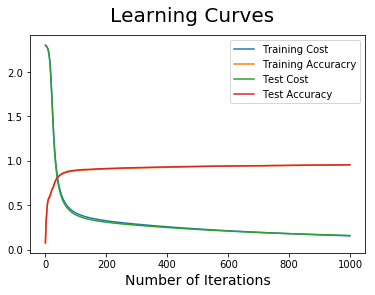

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
for i in range(len(accs)):
    accs[i] = float(accs[i]/100)
    accs_test[i] = float(accs_test[i]/100)
plt.plot(costs, label = 'Training Cost')
plt.plot(accs, label = 'Training Accuracry')
plt.plot(costs_test, label = 'Test Cost')
plt.plot(accs_test, label = 'Test Accuracy')
plt.legend()
plt.savefig('MultiLayer.png')

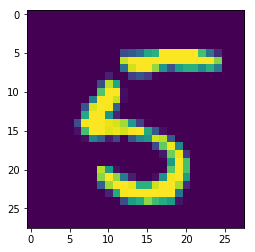

It is a :  5


In [31]:
index = 897
x = X_test[:,index].reshape(784,1)
im = x.reshape(28,28)
plt.imshow(im)
plt.show()
A, Z = forward_prop(x, parameters)
print("It is a : ",np.argmax(A))

In [32]:
import pandas as pd
dfW1 = pd.DataFrame(parameters["W1"])
dfW1.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/W1.csv",header=None,index=None)

dfW2 = pd.DataFrame(parameters["W2"])
dfW2.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/W2.csv",header=None,index=None)

dfb1 = pd.DataFrame(parameters["b1"])
dfb1.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/b1.csv",header=None,index=None)
            
dfb2 = pd.DataFrame(parameters["b2"])
dfb2.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/b2.csv",header=None,index=None)

dfcosts = pd.DataFrame(costs)
dfcosts.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/costs.csv",header=None,index=None)

dfaccs = pd.DataFrame(accs)
dfaccs.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/accs.csv",header=None,index=None)

dfaccs_test = pd.DataFrame(accs_test)
dfaccs_test.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/accs_test.csv",header=None,index=None)

dfcosts_test = pd.DataFrame(costs_test)
dfcosts_test.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/NumPy Multi Layer Parameters/costs_test.csv",header=None,index=None)